# Download greek language model for spacy

In [1]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 94.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


# Import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
spacy.load('el_core_news_sm')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
nlp = spacy.load("el_core_news_sm")
df = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/train_set.csv")
test_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/test_set.csv")
valid_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/valid_set.csv")

df['Label_Map'] = df['Sentiment'].map({
    'NEGATIVE' : 0, 'NEUTRAL' : 1, 'POSITIVE' : 2
})
valid_df['Label_Map'] = valid_df['Sentiment'].map({
    'NEGATIVE' : 0, 'NEUTRAL' : 1, 'POSITIVE' : 2
})


# Functions for data preprocessing

In [4]:
def lowercase_without_accentds(text):
    chars = "ΆΈΊΌΎΉάέίόύήώ"
    lchars = "αειουηαειουηω"
    return text.translate(str.maketrans(chars,lchars))

def extract_greek_characters(input_string):
    greek_pattern = re.compile('[Α-Ωα-ω]+')
    greek_characters = greek_pattern.findall(input_string)
    result = ' '.join(greek_characters)
    return result

greek_stopwords = ["ο","ειναι","απο","https","co","λεπω","λεμε","ειπα","ειπες","εβαλα","αδιακοπα","αι","ακομα","ακομη","ακριβως","αληθεια","αληθινα","αλλα","αλλαχου","αλλες","αλλη","αλλην","αλλης","αλλιως","αλλιωτικα","αλλο","αλλοι","αλλοιως","αλλοιωτικα","αλλον","αλλος","αλλοτε","αλλου","αλλους","αλλων","αμα","αμεσα","αμεσως","αν","ανα","αναμεσα","αναμεταξυ","ανευ","αντι","αντιπερα","αντις","ανω","ανωτερω","αξαφνα","απ","απεναντι","απο","αποψε","αρα","αραγε","αργα","αργοτερο","αριστερα","αρκετα","αρχικα","ας","αυριο","αυτα","αυτες","αυτη","αυτην","αυτης","αυτο","αυτοι","αυτον","αυτος","αυτου","αυτους","αυτων","αφοτου","αφου","βεβαια","βεβαιοτατα","γι","για","γρηγορα","γυρω","δα","δε","δεινα","δεν","δεξια","δηθεν","δηλαδη","δι","δια","διαρκως","δικα","δικο","δικοι","δικος","δικου","δικους","διολου","διπλα","διχως","εαν","εαυτο","εαυτον","εαυτου","εαυτους","εαυτων","εγκαιρα","εγκαιρως","εγω","εδω","ειδεμη","ειθε","ειμαι","ειμαστε","ειναι","εις","εισαι","εισαστε","ειστε","ειτε","ειχα","ειχαμε","ειχαν","ειχατε","ειχε","ειχες","εκαστα","εκαστες","εκαστη","εκαστην","εκαστης","εκαστο","εκαστοι","εκαστον","εκαστος","εκαστου","εκαστους","εκαστων","εκει","εκεινα","εκεινες","εκεινη","εκεινην","εκεινης","εκεινο","εκεινοι","εκεινον","εκεινος","εκεινου","εκεινους","εκεινων","εκτος","εμας","εμεις","εμενα","εμπρος","εν","ενα","εναν","ενας","ενος","εντελως","εντος","εντωμεταξυ","ενω","εξ","εξαφνα","εξης","εξισου","εξω","επανω","επειδη","επειτα","επι","επισης","επομενως","εσας","εσεις","εσενα","εστω","εσυ","ετερα","ετεραι","ετερας","ετερες","ετερη","ετερης","ετερο","ετεροι","ετερον","ετερος","ετερου","ετερους","ετερων","ετουτα","ετουτες","ετουτη","ετουτην","ετουτης","ετουτο","ετουτοι","ετουτον","ετουτος","ετουτου","ετουτους","ετουτων","ετσι","ευγε","ευθυς","ευτυχως","εφεξης","εχει","εχεις","εχετε","εχθες","εχομε","εχουμε","εχουν","εχτες","εχω","εως","η","ηδη","ημασταν","ημαστε","ημουν","ησασταν","ησαστε","ησουν","ηταν","ητανε","ητοι","ηττον","θα","ι","ιδια","ιδιαν","ιδιας","ιδιες","ιδιο","ιδιοι","ιδιον","ιδιος","ιδιου","ιδιους","ιδιων","ιδιως","ιι","ιιι","ισαμε","ισια","ισως","καθε","καθεμια","καθεμιας","καθενα","καθενας","καθενος","καθετι","καθολου","καθως","και","κακα","κακως","καλα","καλως","καμια","καμιαν","καμιας","καμποσα","καμποσες","καμποση","καμποσην","καμποσης","καμποσο","καμποσοι","καμποσον","καμποσος","καμποσου","καμποσους","καμποσων","κανεις","κανεν","κανενα","κανεναν","κανενας","κανενος","καποια","καποιαν","καποιας","καποιες","καποιο","καποιοι","καποιον","καποιος","καποιου","καποιους","καποιων","καποτε","καπου","καπως","κατ","κατα","κατι","κατιτι","κατοπιν","κατω","κιολας","κλπ","κοντα","κτλ","κυριως","λιγακι","λιγο","λιγωτερο","λογω","λοιπα","λοιπον","μα","μαζι","μακαρι","μακρυα","μαλιστα","μαλλον","μας","με","μεθαυριο","μειον","μελει","μελλεται","μεμιας","μεν","μερικα","μερικες","μερικοι","μερικους","μερικων","μεσα","μετ","μετα","μεταξυ","μεχρι","μη","μηδε","μην","μηπως","μητε","μια","μιαν","μιας","μολις","μολονοτι","μοναχα","μονες","μονη","μονην","μονης","μονο","μονοι","μονομιας","μονος","μονου","μονους","μονων","μου","μπορει","μπορουν","μπραβο","μπρος","να","ναι","νωρις","ξανα","ξαφνικα","ο","οι","ολα","ολες","ολη","ολην","ολης","ολο","ολογυρα","ολοι","ολον","ολονεν","ολος","ολοτελα","ολου","ολους","ολων","ολως","ολωςδιολου","ομως","οποια","οποιαδηποτε","οποιαν","οποιανδηποτε","οποιας","οποιαςδηποτε","οποιδηποτε","οποιες","οποιεςδηποτε","οποιο","οποιοδηποτε","οποιοι","οποιον","οποιονδηποτε","οποιος","οποιοςδηποτε","οποιου","οποιουδηποτε","οποιους","οποιουςδηποτε","οποιων","οποιωνδηποτε","οποτε","οποτεδηποτε","οπου","οπουδηποτε","οπως","ορισμενα","ορισμενες","ορισμενων","ορισμενως","οσα","οσαδηποτε","οσες","οσεςδηποτε","οση","οσηδηποτε","οσην","οσηνδηποτε","οσης","οσηςδηποτε","οσο","οσοδηποτε","οσοι","οσοιδηποτε","οσον","οσονδηποτε","οσος","οσοςδηποτε","οσου","οσουδηποτε","οσους","οσουςδηποτε","οσων","οσωνδηποτε","οταν","οτι","οτιδηποτε","οτου","ου","ουδε","ουτε","οχι","παλι","παντοτε","παντου","παντως","παρα","περα","περι","περιπου","περισσοτερο","περσι","περυσι","πια","πιθανον","πιο","πισω","πλαι","πλεον","πλην","ποια","ποιαν","ποιας","ποιες","ποιο","ποιοι","ποιον","ποιος","ποιου","ποιους","ποιων","πολυ","ποσες","ποση","ποσην","ποσης","ποσοι","ποσος","ποσους","ποτε","που","πουθε","πουθενα","πρεπει","πριν","προ","προκειμενου","προκειται","προπερσι","προς","προτου","προχθες","προχτες","πρωτυτερα","πως","σαν","σας","σε","σεις","σημερα","σιγα","σου","στα","στη","στην","στης","στις","στο","στον","στου","στους","στων","συγχρονως","συν","συναμα","συνεπως","συνηθως","συχνα","συχνας","συχνες","συχνη","συχνην","συχνης","συχνο","συχνοι","συχνον","συχνος","συχνου","συχνου","συχνους","συχνων","συχνως","σχεδον","σωστα","τα","ταδε","ταυτα","ταυτες","ταυτη","ταυτην","ταυτης","ταυτο,ταυτον","ταυτος","ταυτου","ταυτων","ταχα","ταχατε","τελικα","τελικως","τες","τετοια","τετοιαν","τετοιας","τετοιες","τετοιο","τετοιοι","τετοιον","τετοιος","τετοιου","τετοιους","τετοιων","τη","την","της","τι","τιποτα","τιποτε","τις","το","τοι","τον","τος","τοσα","τοσες","τοση","τοσην","τοσης","τοσο","τοσοι","τοσον","τοσος","τοσου","τοσους","τοσων","τοτε","του","τουλαχιστο","τουλαχιστον","τους","τουτα","τουτες","τουτη","τουτην","τουτης","τουτο","τουτοι","τουτοις","τουτον","τουτος","τουτου","τουτους","τουτων","τυχον","των","τωρα","υπ","υπερ","υπο","υποψη","υποψιν","υστερα","φετος","χαμηλα","χθες","χτες","χωρις","χωριστα","ψηλα","ω","ωραια","ως","ωσαν","ωσοτου","ωσπου","ωστε","ωστοσο","ωχ","ο","η","το","τα","τη","δηλαδη","μεχρι","γιατι","εχω","στους","μια","ένας","μία","κάποιος","κάποια","κάποιο","κάποιοι","αυτος","αυτη","αυτο","αυτοι","αυτες","αυτα","στο","στη","στα","για","με","απο","προς","ειναι","εχει","εχουν","θα","δεν","πανω","κατω","μεσα","εξω","κατω","ως","πανω","κατω","πιο","εδω","εκει","πολυ","λιγο","τωρα","ακομα","ομως","επισης","παντα","ακομη","πιθανως","μονο","οχι","ναι","ευχαριστως","γενικα","ολοι","ολες","ολα","ποιος","ποια","ποιο","ποιοι","ποιες","τιποτα","κανεις","καμια","κανενα","κανενες","αυτος","αυτη","αυτο","αυτοι","αυτες","αυτα","απο","σε","υπο","μετα","πριν","επειτα","αντι","εναν","μιαν","κανεναν","καμιαν","κανενα","καμια","μιαν","ενα","οποιος","οποια","οποιο","οποιοι","οποιες","οποιαν","οποιον","ολος","ολη","ολα","ολους","ολες","ολων","καθενας","καθεμια","καθενα","καθενες","ακομα","ενω","επομενως","συνεπως","επιπλεον","παρολα αυτα","παρ ολα αυτα","επισης","και","αλλα","αλλα και","αν","εαν","αν και","αντι","αντι να","αντι το","αντι τα","αντι του","αντι τη","αντι των","αντι στο","αντι στη","αντι στα","αντι στου","αντι στην","αντι στις","αντι στον","μεσω","τους","μας","ηταν","εκ","φορα","πρωτη","ειχα","εμεις","εσεις","ηδη","απ","εγινε","ειχε","αλλα","ουτε","ενας","εσας","αυτοι","αυτο","νεα","οντως","θελετε","κανει","σ","μας","πρεπε","ε","μαλιστα","τους","ηθελε","παω","εβαλε","λεει","γ","ν","θες","ερχεται","διαρκεια","θελουν","ασε","χ","λες","ξερω","α","δω","ειδε","μπηκε","βαλει","μερες","εφοσον","ενα","δυο","τρια","γινει","εργο","μιλαω","μιλησε","ποσα","ωρες","πρωινες","πρωτα","θελει","βαζω","εβαζε","εναντι","μπορεις","βρισκει","δει","μπορω","γινε","κανουν"]
pattern = '#!$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~-><]'

def process_text(text):
    
#     new_text = extract_greek_characters(text)
    doc = nlp(text)
    processed_words = []
    # Loop through each word
    for word in doc:
        if word.is_punct or any(char.isdigit() for char in word.text) or word.text in greek_stopwords:
            continue
        else:
            clean_word = word.lemma_
            clean_word = lowercase_without_accentds(clean_word)
            clean_word = clean_word.lower()
            if clean_word not in greek_stopwords:
                processed_words.append(clean_word)
    # Join the processed words back into a string
    processed_text = ' '.join(processed_words)
    return processed_text


# Data preprocesing

In [5]:
import os
# os.remove('train.json')
# os.remove('valid.json')
text = df['Text']
valid_text = valid_df['Text']
print("Preproccesing training data")
df['processed_text'] = text.apply(process_text)
df.to_json('train.json', orient='records', lines=True)
print("Preproccesing valid data")
valid_df['processed_text'] = valid_text.apply(process_text)
valid_df.to_json('valid.json', orient='records', lines=True)
print("Vectorization")

Preproccesing training data
Preproccesing valid data
Vectorization


# Read preprocessed texts from files

In [6]:
# Write the DataFrame to a JSON file
df_read = pd.read_json('train.json', lines=True)
train_preprocessed_text = df['processed_text']
valid_df_read = pd.read_json('valid.json', lines=True)
valid_preprocessed_text = valid_df_read['processed_text']
print("TEST")
print(len(train_preprocessed_text))
print("VALID")
print(len(valid_preprocessed_text))

TEST
36630
VALID
5232


# Vectorization

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Text Vectorization
text_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
train_text_features = text_vectorizer.fit_transform(train_preprocessed_text)
valid_text_features = text_vectorizer.transform(valid_preprocessed_text)

# Party Column Encoding
party_encoder = OneHotEncoder()
train_party_features = party_encoder.fit_transform(df[['Party']])
valid_party_features = party_encoder.transform(valid_df[['Party']])

# Combining Features
X_train = hstack((train_text_features, train_party_features))
X_valid = hstack((valid_text_features, valid_party_features))

# Logistic Regration

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# # define models and parameters
# model = LogisticRegression(max_iter=1000)
# solvers = ['newton-cg','liblinear','lbfgs','sag', 'saga']
# penalty = ['l2']
# # c_values = [100, 10, 1.0, 0.1, 0.01]
# c_values = [0.1]
# # define grid search
# grid = dict(solver=solvers,C=c_values,penalty=penalty)
# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='f1_macro',error_score=0)
# grid_result = grid_search.fit(X_train, df.Label_Map)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

classifier = LogisticRegression(max_iter=1000, C = 0.1)
clf = classifier.fit(X_train, df.Label_Map)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_valid)

#4. print the classfication report
print(classification_report(valid_df.Label_Map, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.51      0.44      1744
           1       0.40      0.31      0.35      1744
           2       0.42      0.40      0.41      1744

    accuracy                           0.41      5232
   macro avg       0.41      0.41      0.40      5232
weighted avg       0.41      0.41      0.40      5232



# Frequency graph

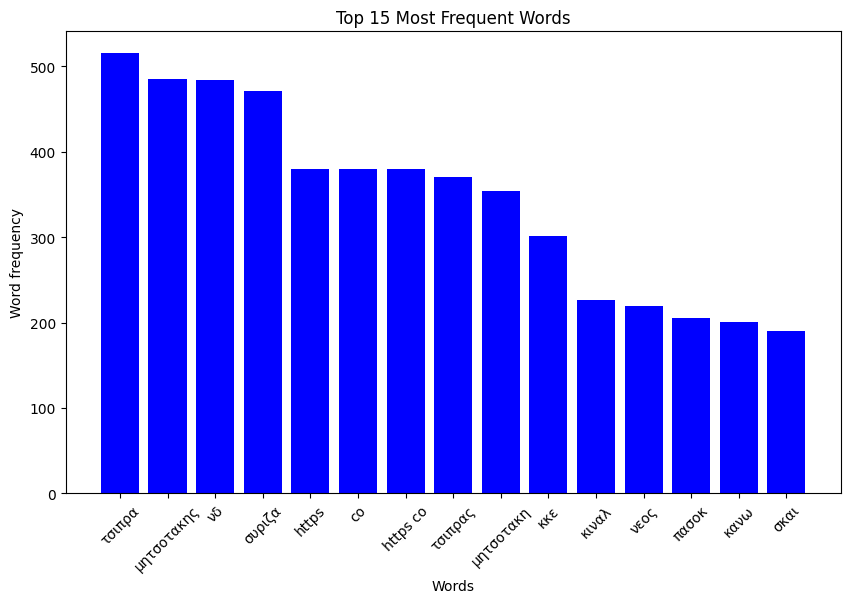

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

feature_names = text_vectorizer.get_feature_names_out()
word_frequencies = train_text_features.sum(axis=0).A1
sorted_indices = word_frequencies.argsort()[::-1]

top_words = [feature_names[index] for index in sorted_indices[:15]]
top_frequencies = [word_frequencies[index] for index in sorted_indices[:15]]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Word frequency')
plt.title('Top 15 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# Word cloud

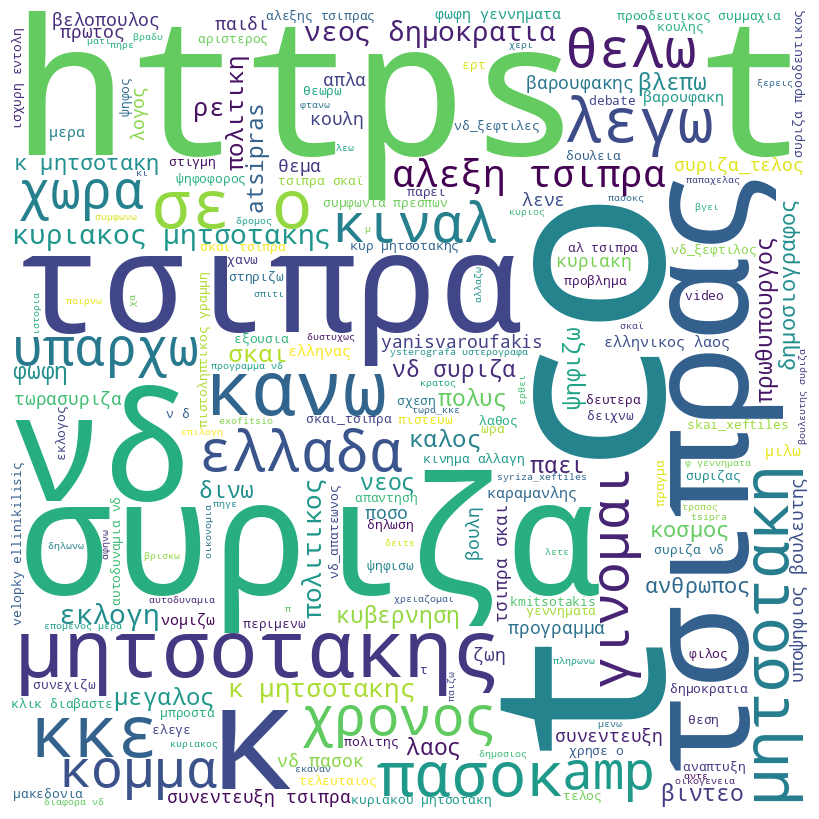

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in train_preprocessed_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Roc curve

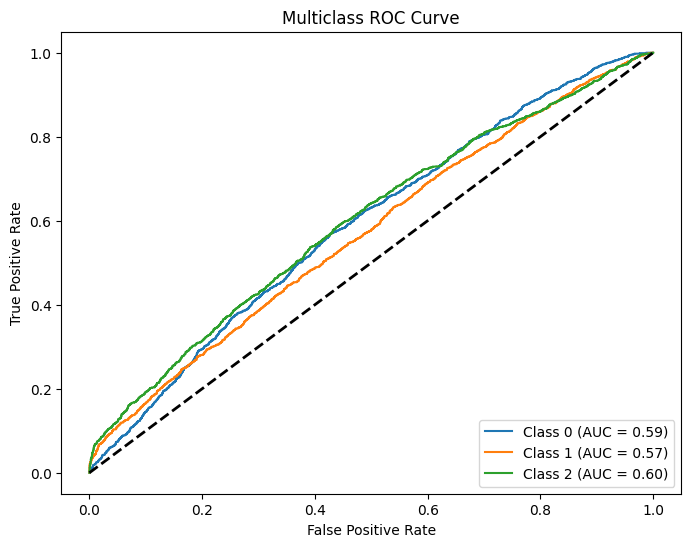

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train, X_valid, df.Label_Map, valid_df.Label_Map are defined

# # Train the logistic regression model
# classifier = LogisticRegression(max_iter=1000)
# clf = OneVsRestClassifier(classifier)
# clf.fit(X_train, label_binarize(df.Label_Map, classes=np.unique(df.Label_Map)))

# Get the predicted probabilities for each class on the validation set
y_score = clf.decision_function(X_valid)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(df.Label_Map))):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(valid_df.Label_Map, classes=np.unique(df.Label_Map))[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(df.Label_Map))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot the random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Learning cuve

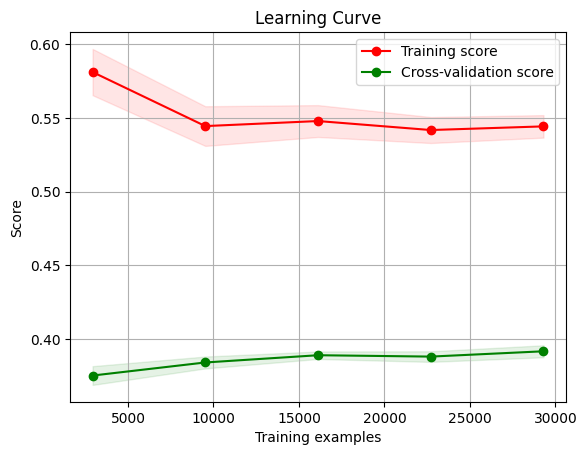

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have already imported necessary libraries and defined X_train, y_train, X_valid, y_valid, and classifier (Logistic Regression)

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(classifier, "Learning Curve", X_train, df.Label_Map, cv=5)
plt.show()

# Confusion matrix

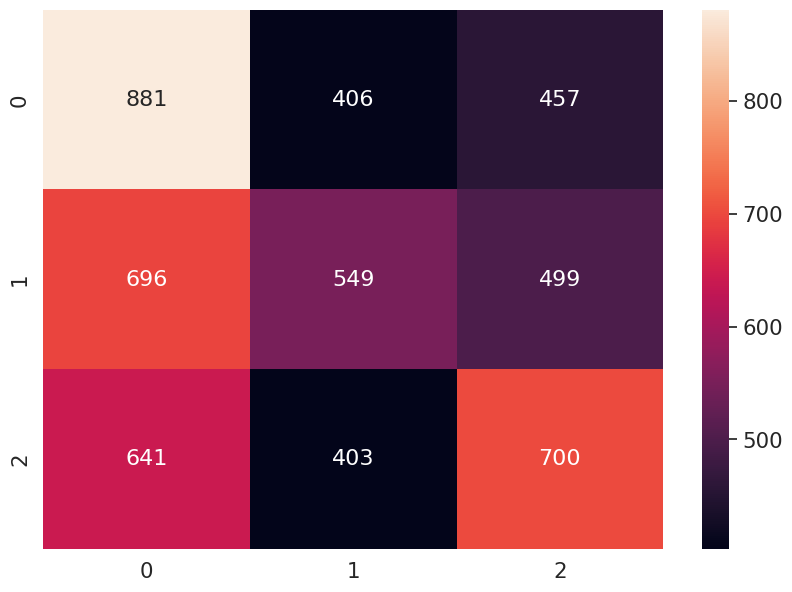

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix(valid_df.Label_Map, y_pred)
df_cm = pd.DataFrame(array, range(3), range(3))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size

plt.show()

# Submission

In [14]:
import csv

# Data to be written to the CSV file
predictions = []

# Specify the file name
file_name = 'submission.csv'

test_text = test_df['Text']
test_df['processed_text'] = test_text.apply(process_text)
test_preprocessed_text = test_df['processed_text']
test_text_features = text_vectorizer.transform(test_preprocessed_text)
test_party_features = party_encoder.transform(test_df[['Party']])

# Combining Features
X_test = hstack((test_text_features, test_party_features))

test_pred = clf.predict(X_test)

In [15]:
number_to_sentiment = {
    0: "NEGATIVE",
    1: "NEUTRAL",
    2: "POSITIVE",
}
array = [number_to_sentiment[value] for value in test_pred]

In [16]:
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Predicted"])

    for idx, word in enumerate(array, start=1):
        writer.writerow([idx, word])